In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-']
url='https://raw.githubusercontent.com/sarthakjain36/cardio_data/main/cardio_train.csv'
df=pd.read_csv(url, delimiter=';', na_values=missing_values)
print('There are Total {} datapoints in the dataset with {} Features listed as {}:'.format(df.shape[0], df.shape[1], df.columns.values))

There are Total 70000 datapoints in the dataset with 13 Features listed as ['id' 'age' 'gender' 'height' 'weight' 'sbp' 'dbp' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active' 'cardio']:


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   sbp          70000 non-null  int64  
 6   dbp          70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os#Walking through directores

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

from sklearn import decomposition #pca
from sklearn.preprocessing import StandardScaler # Standardization ((X - X_mean)/X_std)

from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from sklearn.linear_model import LogisticRegression #Logistic Model

from sklearn.model_selection import train_test_split # Splitting into train and test

from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 
pd.set_option('display.max_columns', None)

# New Section

In [5]:
features_with_null = [features for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

df.drop(columns=['id'], inplace=True)

duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Dataset contains no Null Values
Duplicates Rows in Dataset are : 24
Total 69976 datapoints remaining with 12 features


In [6]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight','sbp','dbp']])
#print(sum(df['ap_hi']<0)+sum(df['ap_hi']>=180))

outline_free_df = df.copy()
outline_free_df[['height', 'weight']] = np.log(outline_free_df[['height', 'weight']])
outliers(outline_free_df[['height', 'weight']])

outline_free_df = outline_free_df[(outline_free_df['weight'] > outline_free_df['weight'].quantile(0.005)) & (outline_free_df['weight'] < outline_free_df['weight'].quantile(0.995))]
outline_free_df = outline_free_df[(outline_free_df['height'] > outline_free_df['height'].quantile(0.005)) & (outline_free_df['height'] < outline_free_df['height'].quantile(0.995))]
outliers(outline_free_df[['height', 'weight']])
print('Handling outliners cost us {} datapoints'.format(len(df)-len(outline_free_df)))

outline_free_df = outline_free_df[outline_free_df['dbp']>=0]
outline_free_df = outline_free_df[outline_free_df['sbp']>=0]

print('There are total {} observations where ap_hi < ap_lo'.format(len(outline_free_df[outline_free_df['sbp'] < outline_free_df['dbp']])))

cleaned_data = outline_free_df[outline_free_df['sbp'] >= outline_free_df['dbp']].reset_index(drop=True)
print('Total observations preserved : {}'.format(len(cleaned_data)))
print('As per our assumptions we have total {} outliers'.format(len(cleaned_data[(cleaned_data["sbp"]>240) | (cleaned_data["dbp"]>160)])))

cleaned_data = cleaned_data[((cleaned_data["sbp"]<=240)&(cleaned_data["sbp"]>=80)) & (cleaned_data["dbp"]<=160)]
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], cleaned_data.shape[1]))

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819
For the feature sbp, No of Outliers is 1435
For the feature dbp, No of Outliers is 4632
For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174
For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349
Handling outliners cost us 1630 datapoints
There are total 1182 observations where ap_hi < ap_lo
Total observations preserved : 67156
As per our assumptions we have total 41 outliers
Total 67105 datapoints remaining with 12 features


In [7]:
duplicate_sum = cleaned_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

duplicated = cleaned_data[cleaned_data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

cleaned_data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cleaned_data.shape[0], df.shape[1]))

Dataset contains no Duplicate Values
Total 67105 datapoints remaining with 12 features


In [8]:
Categorial_features = [feature for feature in cleaned_data.columns if len(cleaned_data[feature].unique())<25]
print('Categorial Values are : {}'.format(Categorial_features))

Categorial Values are : ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [9]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
dfcol=cleaned_data.columns
dfscale=scaler.fit_transform(cleaned_data)
dfscale2=pd.DataFrame(dfscale, columns=dfcol)
dfscale2.head()

,age,gender,height,weight,sbp,dbp,cholesterol,gluc,smoke,alco,active,cardio
0,0.588076,1.0,0.592853,0.304067,0.1875,0.5000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.730159,0.0,0.279829,0.620852,0.3750,0.5625,1.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.0,0.516745,0.335944,0.3125,0.4375,1.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,1.0,0.617920,0.584776,0.4375,0.6250,0.0,0.0,0.0,0.0,1.0,1.0
4,0.516918,0.0,0.279829,0.201876,0.1250,0.3750,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
xdf=dfscale2.iloc[:,0:11]
ydf=dfscale2.iloc[:,-1]
x_training, x_testing, y_training, y_testing = train_test_split(xdf, ydf, test_size = 0.2, 
                                                                random_state=123, stratify=ydf)

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(25, input_dim=11, activation='softsign', kernel_constraint=maxnorm(2)))
#model.add(Dropout(0))
model.add(Dense(5, activation='softsign'))
#model.add(Dropout(0))
model.add(Dense(3, activation='softsign'))
#model.add(Dropout(0))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_training, y_training, epochs=100, batch_size=100, verbose=0)
score = model.evaluate(x_training, y_training)
print("\n Training Accuracy:", score[1])
score = model.evaluate(x_testing, y_testing)
print("\n Testing Accuracy:", score[1])

1678/1678 [==============================] - 2s 899us/step - loss: 0.5400 - accuracy: 0.7351

 Training Accuracy: 0.7351352572441101
420/420 [==============================] - 0s 941us/step - loss: 0.5421 - accuracy: 0.7330

 Testing Accuracy: 0.732955813407898


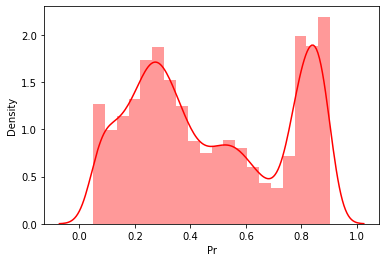

In [13]:

import seaborn as sns 
res=model.predict(x_testing)
res
resdf=pd.DataFrame(res, index=x_testing.index)
resdf.columns=["Pr"]
resdf["ID"]=range(13421)
resdf["y"]=np.where(resdf["Pr"]>=0.5,"1", "0")
resdf
prediction=resdf.drop(["Pr","ID"], axis=1)
predictionarray=prediction.astype(np.float)
sns.distplot(resdf["Pr"],  color="red")

In [14]:
c1=resdf[['ID','y']].groupby('y').count()
c1

,ID
y,
0,7556
1,5865


In [15]:
y_testingdf=pd.DataFrame(y_testing, index=y_testing.index)
y_testingdf["ID"]=range(13421)
y_test=y_testingdf.drop(["ID"], axis=1)
c2=y_testingdf[['ID','cardio']].groupby('cardio').count()
c2

,ID
cardio,
0.0,6786
1.0,6635


In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values, predictionarray)
cm

array([[5383, 1403],
       [2173, 4462]])

In [17]:
Accuracy=cm[0,0]/(cm[0,0]+cm[1,0])
print("The accuracy of the model is: "+ str(Accuracy*100) + " %")

The accuracy of the model is: 71.24139756484912 %


In [18]:
day= 25 # day of bith 
month= 9 # month of bith (in numbers)
year= 1998 # year of bith
gender= 1 # 0 for women, 1 for men
height= 183 # in cm
weight= 89 # in kilograms
systolicbloodpressure= 120 # Systolic blood pressure
diastolicbloodpressure= 80 # Diastolic blood pressure
cholesterol= 1 # 1: normal, 2: above normal, 3: well above normal
gluc= 1 # 1: normal, 2: above normal, 3: well above normal
smoke= 0 # 1 if you smoke, 0 if not
alco= 0 # 1 if you drink alcohol, 0 if not
active= 1 # 1 if you do physical activity, 0 if not

##############################################################################
from datetime import date
f_date = date(year,month,day)
l_date = date.today()
delta = l_date - f_date
agedays=delta.days

agedayscale=(agedays-df["age"].min())/(df["age"].max()-df["age"].min())
heightscale=(height-df["height"].min())/(df["height"].max()-df["height"].min())
weightscale=(weight-df["weight"].min())/(df["weight"].max()-df["weight"].min())
sbpscale=(systolicbloodpressure-df["sbp"].min())/(df["sbp"].max()-df["sbp"].min())
dbpscale=(diastolicbloodpressure-df["dbp"].min())/(df["dbp"].max()-df["dbp"].min())
cholesterolscale=(cholesterol-df["cholesterol"].min())/(df["cholesterol"].max()-df["cholesterol"].min())
glucscale=(gluc-df["gluc"].min())/(df["gluc"].max()-df["gluc"].min())

single=np.array([agedayscale, gender, heightscale, weightscale, sbpscale, dbpscale, cholesterolscale, glucscale, smoke, alco, active ])
singledf=pd.DataFrame(single)
final=singledf.transpose()
final

,0,1,2,3,4,5,6,7,8,9,10
0,-0.205575,1.0,0.65641,0.415789,0.016698,0.01355,0.0,0.0,0.0,0.0,1.0


In [19]:

prediction=model.predict_proba(final)

if prediction[0,0]>=0.5:
    print("The probability of having or to have a Cardiovascular Disease is: "+ str(round(prediction[0,0]*100,2)) + "%")
    print("You must visit a doctor to check it :(")
elif prediction[0,0]<0.5 and prediction[0,0]>=0.3:
    print("The probability of having or to have a Cardiovascular Disease is: "+ str(round(prediction[0,0]*100,2)) + "%")
    print("Probably you are healthy :/ ")
else:
    print("The probability of having or to have a Cardiovascular Disease is: "+ str(round(prediction[0,0]*100,2)) + "%")
    print("You are healthy :) ")

The probability of having or to have a Cardiovascular Disease is: 4.59%
You are healthy :) 


**Dimensionality Redustion Techniques**

In [20]:
y = np.array(cleaned_data['cardio'])     
X = np.array(cleaned_data.drop(['cardio'], axis=1))
X.shape
y.shape


(67105,)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#target_value = cleaned_data['cardio']     #PCA for dimentionality Reduction
#cleaned_data_for_pca = cleaned_data.drop(['cardio'], axis=1)

In [23]:
#scaled_data = StandardScaler().fit_transform(cleaned_data_for_pca)

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('first', 'second', 'label'))

In [24]:
fig = go.Figure(data=go.Scattergl(
    x = pca_df['first'], 
    y = pca_df['second'],
    mode='markers',
    marker_color=pca_df['label']
))

fig.show()

That's our whole dataset in 2D. Though visually it seems they kind of forms some clusters, they still have lots disturbance.

**LDA Method**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy -> ' + str(accuracy_score(y_test, y_pred)))

[[5174 1604]
 [2056 4587]]
Accuracy -> 0.7272930482080322
